<a href="https://colab.research.google.com/github/luilambu/Talleres-Analitica-de-Neg-2022-2/blob/main/Pronostico_HW%2C_car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 1992-01-01 to 2020-04-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Retail_Sales  340 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


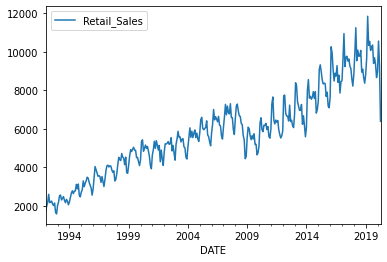

In [ ]:
datos = pd.read_csv("car_sales.csv")

datos = pd.read_csv("car_sales.csv",header=0,index_col=[0],infer_datetime_format=True, parse_dates=["DATE"],dayfirst=True )
datos
datos.info()
datos.index.freq="MS"
datos.plot()

In [ ]:
datos_train=datos.iloc[:-12]
#print(datos_train)
datos_test=datos.iloc[-12:]
#print(datos_test)
modelo= HWES(datos_train,seasonal_periods=12,trend='add',seasonal='mul')
ajuste = modelo.fit(optimized=True,use_brute=True)
print(ajuste.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23660947.739
Optimized:                         True   AIC                           3701.114
Trend:                         Additive   BIC                           3761.802
Seasonal:                Multiplicative   AICC                          3703.327
Seasonal Periods:                    12   Date:                 Thu, 03 Nov 2022
Box-Cox:                          False   Time:                         17:36:56
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3939286                alpha                 True
smoothing_trend          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
pronostico= ajuste.forecast(steps=12)
pronostico

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2019-05-01    10356.821725
2019-06-01    10108.749289
2019-07-01     9948.541530
2019-08-01    10156.788764
2019-09-01     9247.916654
2019-10-01     9399.463788
2019-11-01     8763.046798
2019-12-01     8545.284480
2020-01-01     9010.702638
2020-02-01    10328.183063
2020-03-01    12084.679858
2020-04-01    10208.011822
Freq: MS, dtype: float64

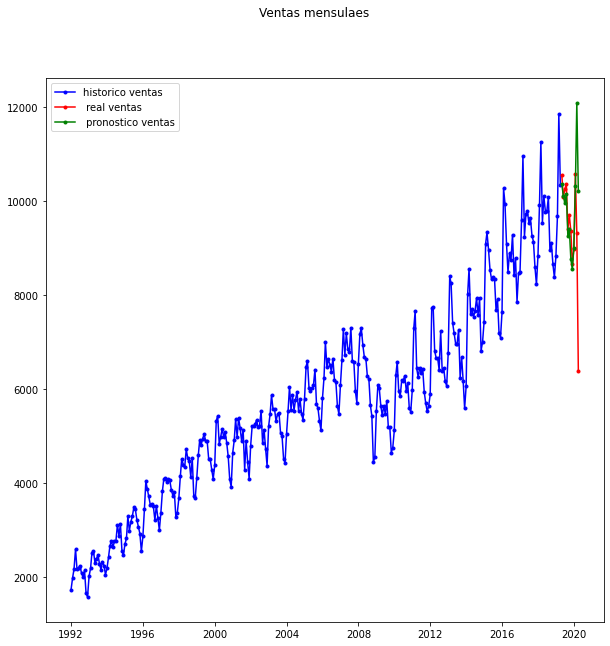

In [ ]:
fig= plt.figure(figsize=(10,10))
fig.suptitle("Ventas mensulaes ")
past, =plt.plot(datos_train.index, datos_train ,'b.-', label="historico ventas")
future, =plt.plot(datos_test.index, datos_test ,'r.-', label=" real ventas")
pronos, =plt.plot(datos_test.index, pronostico ,'g.-', label=" pronostico ventas")
plt.legend(handles=[past, future, pronos,])
plt.show()